In [ ]:
import numpy as np
import pandas as pd


In [ ]:
!pip install scapy

     |████████████████████████████████| 1.1 MB 10.0 MB/s 
  Created wheel for scapy: filename=scapy-2.4.5-py2.py3-none-any.whl size=1261555 sha256=354874c3aae1aa3e3002a7b7bcbbb43a52891445925c75124430e630767d9812
  Stored in directory: /root/.cache/pip/wheels/b9/6e/c0/0157e466a5e02d3ff28fc7587dff329b4a967a23b3f9b11385
Successfully built scapy


In [ ]:
#!/usr/bin/python
from scapy.all import *
import random
import sys, os

In [ ]:
gamma = 1
initial_state = 0

In [ ]:
df = pd.read_csv('test1.csv')

In [ ]:
df.shape

(1006, 7)

In [ ]:
action = [0, 1]

In [ ]:
df.head(50
        )

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,fe80::a00:27ff:fee0:d57d,ff02::2,ICMPv6,62,Router Solicitation
1,2,0.148652,PcsCompu_17:25:ef,Broadcast,ARP,60,Who has 10.0.2.1? Tell 10.0.2.5
2,3,0.651420,PcsCompu_17:25:ef,Broadcast,ARP,60,Who has 10.0.2.6? Tell 10.0.2.5
3,4,0.651444,PcsCompu_e0:d5:7d,PcsCompu_17:25:ef,ARP,42,10.0.2.6 is at 08:00:27:e0:d5:7d
4,5,1.185003,122.22.210.164,10.0.2.6,TCP,60,39996 > 135 [SYN] Seq=0 Win=351 Len=0
5,6,1.185051,PcsCompu_e0:d5:7d,Broadcast,ARP,42,Who has 10.0.2.1? Tell 10.0.2.6
6,7,1.185380,122.22.210.164,10.0.2.6,TCP,60,3729 > 135 [SYN] Seq=0 Win=3615 Len=0
7,8,1.185380,RealtekU_12:35:00,PcsCompu_e0:d5:7d,ARP,60,10.0.2.1 is at 52:54:00:12:35:00
8,9,1.185395,10.0.2.6,122.22.210.164,TCP,54,"135 > 39996 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0"
9,10,1.185404,10.0.2.6,122.22.210.164,TCP,54,"135 > 3729 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0"


In [ ]:
class PCAPHandler:

	#maps packet type to its string version
	pkt_type = {}

	#maps int IP packet type identifier to its string version
	IP_type = {}

	#dictionary where key are packet sections, and values are lists of strings that are keys for those packet sections
	supported_keys = {}

	def __init__(self):
		

		#initializes packet types
		#https://en.wikipedia.org/wiki/EtherType
		self.pkt_type[0] = "None"
		self.pkt_type[2048] = "IP"
		self.pkt_type[2054] = "ARP"
		self.pkt_type[34525] = "IPv6"
		self.pkt_type[35020] = "LLDP"

		#https://en.wikipedia.org/wiki/List_of_IP_protocol_numbers
		self.IP_type[0] = "Hop-by-Hop Option Header"
		self.IP_type[1] = "ICMP"
		self.IP_type[2] = "ROUTER"
		self.IP_type[6] = "TCP"
		self.IP_type[17] = "UDP"
		self.IP_type[58] = "ICMPv6"





		
		ethernet_keys = ["overall_type", "source", "destination", "timestamp"]
		#Ethernet information
		IP_keys = ["packet_type", "length", "checksum", "source", "destination"]
		IPv6_keys = ["packet_type", "traffic_class", "payload_length", "next_header", "hop_limit", "source", "destination"]
		ARP_keys = ["length", "operation", "hardware_source", "protocol_source", "hardware_destination", "protocol_destination"]
		LLDP_keys = [] #Link Layer Discovery Protocol
		#IP information
		UDP_keys = ["udp_len", "udp_checksum", "source_port", "destination_port"]
		# TCP_keys = ["tcp_checksum", "source_port", "destination_port", "ack", "flags", "tcp_options"]
		TCP_keys = ["tcp_checksum", "source_port", "destination_port", "ack", "flags"]
		ICMP_keys = ["icmp_type", "icmp_checksum"]
		#IPv6 information
		hop_by_hop_keys = []
		ICMPv6_keys = ["icmp_type", "icmp_checksum", "target"]
		#UDP information
		NTP_keys = ["leap", "mode", "stratum", "dispersion", "id"]


		self.supported_keys = {}
		#overall packet type
		self.supported_keys['ethernet_keys'] = ethernet_keys
		#Ethernet type
		self.supported_keys['IP_keys'] = IP_keys
		self.supported_keys['IPv6_keys'] = IPv6_keys
		self.supported_keys['ARP_keys'] = ARP_keys
		self.supported_keys['LLDP_keys'] = LLDP_keys
		#IP section
		self.supported_keys['UDP_keys'] = UDP_keys
		self.supported_keys['TCP_keys'] = TCP_keys
		self.supported_keys['ICMP_keys'] = ICMP_keys
		#IPv6 section
		self.supported_keys['hop_by_hop_keys'] = hop_by_hop_keys
		self.supported_keys['ICMPv6_keys'] = ICMPv6_keys
		#UDP section
		self.supported_keys['NTP_keys'] = NTP_keys #Network Time Protocol



	def read_pcap(self, path):

		#reads the pcap file into list of packets
		packets = rdpcap(path)
		#arr[len(packets)]

		# print(packets)
		# packets.show()

		# packets.decode_payload_as()
		# packets.hexraw()





		## Packet contents ##
		###[ Ethernet ]###
		#   dst       = ff:ff:ff:ff:ff:ff
		#   src       = 00:50:8b:2a:96:0a
		#   type      = 0x800
		# ###[ IP ]###
		#      version   = 4
		#      ihl       = 5
		#      tos       = 0x0
		#      len       = 96
		#      id        = 7
		#      flags     =
		#      frag      = 0
		#      ttl       = 128
		#      proto     = udp
		#      chksum    = 0x1255
		#      src       = 10.100.9.107
		#      dst       = 10.100.9.255
		#      \options   \
		# ###[ UDP ]###
		#         sport     = netbios_ns
		#         dport     = netbios_ns
		#         len       = 76
		#         chksum    = 0xdd80
		# ###[ NBNS query request ]###
		#            NAME_TRN_ID= 64045
		#            FLAGS     = 10512
		#            QDCOUNT   = 1
		#            ANCOUNT   = 0
		#            NSCOUNT   = 0
		#            ARCOUNT   = 1
		#            QUESTION_NAME= b'HEADLESS-PC    '
		#            SUFFIX    = workstation
		#            NULL      = 0
		#            QUESTION_TYPE= NB
		#            QUESTION_CLASS= INTERNET
		# ###[ Raw ]###
		#               load      = b'\xc0\x0c\x00 \x00\x01\x00\x04\x93\xe0\x00\x06\x00\x00\nd\tk'



		all_packets = []

		

		# for pkt in packets:
		# for x in range(0, 10):
		for x in range(0, len(packets)):
			pkt = packets[x]

			
			# print(pkt[IP].dst)
			# print()

			packet_info = {}
			# packet_info['']

			packet_info['Ethernet'] = {}
			# packet_info['']
			packet_info['IP'] = {}
			packet_info['ARP'] = {}
			packet_info['IPv6'] = {}
			#list containing packet specific information based on the packet type
			packet_info['packet_info'] = {}


			overall_packet_type = ""

			
			#checks if packet is an ethernet packet
			try:
				pkt['Ethernet']
				overall_packet_type = "Ethernet"
			except Exception as error:
				#packet is not of type ethernet
				pass


			#checks if packet is a LAN packet
			try:
				pkt["802.3"]
				overall_packet_type = "802.3"
			except Exception as error:
				#packet is not of type ethernet
				pass





			if overall_packet_type=="Ethernet":
				self.read_Ethernet_packet(packet_info, pkt)

				
			if overall_packet_type=="802.3":
				self.read_LAN_packet(packet_info, pkt)







			if overall_packet_type=="Ethernet":

				#if packet is of type IP
				if packet_info['Ethernet']['overall_type']=="IP":
					self.read_IP_packet(packet_info, pkt)

				#if packet is of type ARP (Address Resolution Protocol)
				#Address Resolution Protocol packet contents: https://en.wikipedia.org/wiki/Address_Resolution_Protocol
				elif packet_info['Ethernet']['overall_type']=="ARP":
					self.read_ARP_packet(packet_info, pkt)

				elif packet_info['Ethernet']['overall_type']=="IPv6":
					self.read_IPv6_packet(packet_info, pkt)

				elif packet_info['Ethernet']['overall_type']=="LLDP":
					self.read_LLDP_packet(packet_info, pkt)



			elif overall_packet_type=="802.3":
				pass

			else:
				pass


			

			




			#get the load if there is one
			try:
				packet_info['load'] = pkt[Raw].load
			except Exception as error:
				packet_info['load'] = None


			all_packets.append(packet_info)



		return all_packets




		# for x in range(0, len(packets)):
		# 	# print(packets[x])
		# 	pkt = packets[x]

		# 	# #prints packets in hex format
		# 	# print(hexdump(pkt))

		# 	#prints the bytes version of the already byte default packet
		# 	# print(bytes(pkt))

		# 	print(Ether(pkt))



		# print("Num packets: "+str(len(packets)))

	# compress_packet.__doc__

	#compresses a dictionary packet into a list packet
	def compress_packet(self, packet):
		# supported_keys = []
		# #overall packet type
		# supported_keys.extend(ethernet_keys)
		# #Ethernet type
		# supported_keys.extend(IP_keys)
		# supported_keys.extend(IPv6_keys)
		# supported_keys.extend(ARP_keys)
		# supported_keys.extend(LLDP_keys)
		# #IP section
		# supported_keys.extend(UDP_keys)
		# supported_keys.extend(TCP_keys)
		# supported_keys.extend(ICMP_keys)
		# #IPv6 section
		# supported_keys.extend(hop_by_hop_keys)
		# supported_keys.extend(ICMPv6_keys)
		# #UDP section
		# supported_keys.extend(NTP_keys)


		


		packet_list = []
		#gets Ethernet keys if they exist
		try:
			to_extend = []
			for x in range(0, len(self.supported_keys['ethernet_keys'])):
				to_extend.append(packet['Ethernet'][self.supported_keys['ethernet_keys'][x]])
		except:
			to_extend = [0]*len(self.supported_keys['ethernet_keys'])
		packet_list.extend(to_extend)


		#gets IP keys if they exist
		try:
			to_extend = []
			for x in range(0, len(self.supported_keys['IP_keys'])):
				to_extend.append(packet['IP'][self.supported_keys['IP_keys'][x]])
		except:
			to_extend = [0]*len(self.supported_keys['IP_keys'])
		packet_list.extend(to_extend)

		#gets IPv6 keys if they exist
		try:
			to_extend = []
			for x in range(0, len(self.supported_keys['IPv6_keys'])):
				to_extend.append(packet['IPv6'][self.supported_keys['IPv6_keys'][x]])
		except:
			to_extend = [0]*len(self.supported_keys['IPv6_keys'])
		packet_list.extend(to_extend)

		#gets ARP keys if they exist
		try:
			to_extend = []
			for x in range(0, len(self.supported_keys['ARP_keys'])):
				to_extend.append(packet['ARP'][self.supported_keys['ARP_keys'][x]])
		except:
			to_extend = [0]*len(self.supported_keys['ARP_keys'])
		packet_list.extend(to_extend)

		#gets LLDP keys if they exist
		try:
			to_extend = []
			for x in range(0, len(self.supported_keys['LLDP_keys'])):
				to_extend.append(packet['LLDP'][self.supported_keys['LLDP_keys'][x]])
		except:
			to_extend = [0]*len(self.supported_keys['LLDP_keys'])
		packet_list.extend(to_extend)

		#gets UDP keys if they exist
		try:
			to_extend = []
			for x in range(0, len(self.supported_keys['UDP_keys'])):
				to_extend.append(packet['packet_info'][self.supported_keys['UDP_keys'][x]])
		except:
			to_extend = [0]*len(self.supported_keys['UDP_keys'])
		packet_list.extend(to_extend)

		#gets TCP keys if they exist
		try:
			to_extend = []
			for x in range(0, len(self.supported_keys['TCP_keys'])):
				to_extend.append(packet['packet_info'][self.supported_keys['TCP_keys'][x]])
		except:
			to_extend = [0]*len(self.supported_keys['TCP_keys'])
		packet_list.extend(to_extend)

		#gets ICMP keys if they exist
		try:
			to_extend = []
			for x in range(0, len(self.supported_keys['ICMP_keys'])):
				to_extend.append(packet['packet_info'][self.supported_keys['ICMP_keys'][x]])
		except:
			to_extend = [0]*len(self.supported_keys['ICMP_keys'])
		packet_list.extend(to_extend)

		#gets IPv6 section keys if they exist
		try:
			to_extend = []
			for x in range(0, len(self.supported_keys['hop_by_hop_keys'])):
				to_extend.append(packet['packet_info'][self.supported_keys['hop_by_hop_keys'][x]])
		except:
			to_extend = [0]*len(self.supported_keys['hop_by_hop_keys'])
		packet_list.extend(to_extend)

		#gets IPv6 section keys if they exist
		try:
			to_extend = []
			for x in range(0, len(self.supported_keys['ICMPv6_keys'])):
				to_extend.append(packet['packet_info'][self.supported_keys['ICMPv6_keys'][x]])
		except:
			to_extend = [0]*len(self.supported_keys['ICMPv6_keys'])
		packet_list.extend(to_extend)

		#gets UDP section keys if they exist
		try:
			to_extend = []
			for x in range(0, len(self.supported_keys['NTP_keys'])):
				to_extend.append(packet['packet_info']['NTP'][self.supported_keys['NTP_keys'][x]])
		except:
			to_extend = [0]*len(self.supported_keys['NTP_keys'])
		packet_list.extend(to_extend)



		return packet_list



	#returns values from the Ethernet section of the packet
	def read_Ethernet_packet(self, packet_info, pkt):
		#intializes dictionary
		packet_info['Ethernet'] = {}
		packet_info['Ethernet']['overall_type'] = 0
		packet_info['Ethernet']['source'] = 0
		packet_info['Ethernet']['destination'] = 0
		packet_info['Ethernet']['timestamp'] = 0

		try:
			#get packet type (IP, ARP, etc.)
			packet_info['Ethernet']['overall_type'] = self.pkt_type[pkt.type]
			packet_info['Ethernet']['source'] = pkt.src
			packet_info['Ethernet']['destination'] = pkt.dst
			packet_info['Ethernet']['timestamp'] = pkt['Ethernet'].time
		except Exception as error:
			pkt.show()


	def read_LAN_packet(self, packet_info, pkt):
		packet_info['802.3'] = {}
		packet_info['802.3']['overall_type'] = self.pkt_type[pkt.type]
		packet_info['802.3']['source'] = pkt.src
		packet_info['802.3']['destination'] = pkt.dst






	def read_IP_packet(self, packet_info, pkt):
		packet_info['IP'] = {}

		#packet_type = 17 for UDP, 6 for TCP, 1 for ICMP
		IP_packet_type = self.IP_type[pkt[IP].proto]
		packet_info['IP']['packet_type'] = IP_packet_type
		#hexadecimal checksum is converted to decimal. 
		packet_info['IP']['checksum'] = pkt[IP].chksum
		packet_info['IP']['length'] = pkt[IP].len
		packet_info['IP']['source'] = pkt[IP].src
		packet_info['IP']['destination'] = pkt[IP].dst

		#if packet is of type UDP
		if IP_packet_type=="UDP":
			self.read_UDP_section(packet_info, pkt)
			# print("Time: "+str(pkt[UDP].time))

		#if packet is of type TCP
		elif IP_packet_type=="TCP": 
			self.read_TCP_section(packet_info, pkt)
			# print("Time: "+str(pkt[TCP].time))

		#if packet is of type ICMP
		elif IP_packet_type=="ICMP":
			self.read_ICMP_section(packet_info, pkt)
			# print("Time: "+str(pkt[ICMP].time))


	def read_ARP_packet(self, packet_info, pkt):
		#initializes dictionary
		packet_info['ARP'] = {}
		packet_info['ARP']['length'] = 0
		packet_info['ARP']['operation'] = 0
		packet_info['ARP']['hardware_source'] = 0
		packet_info['ARP']['protocol_source'] = 0
		packet_info['ARP']['hardware_destination'] = 0
		packet_info['ARP']['protocol_destination'] = 0

		try:
			packet_info['ARP']['length'] = pkt[ARP].plen
			packet_info['ARP']['operation'] = pkt[ARP].op
			packet_info['ARP']['hardware_source'] = pkt[ARP].hwsrc
			packet_info['ARP']['protocol_source'] = pkt[ARP].psrc
			packet_info['ARP']['hardware_destination'] = pkt[ARP].hwdst
			packet_info['ARP']['protocol_destination'] = pkt[ARP].pdst
		except Exception as error:
			# print("Couldn't read ARP packet: "+str(error))
			pass


	def read_IPv6_packet(self, packet_info, pkt):
		packet_info['IPv6'] = {}

		IPv6_packet_type = self.IP_type[pkt[IPv6].nh]
		packet_info['IPv6']['packet_type'] = IPv6_packet_type
		packet_info['IPv6']['traffic_class'] = pkt[IPv6].tc
		packet_info['IPv6']['payload_length'] = pkt[IPv6].plen
		packet_info['IPv6']['next_header'] = pkt[IPv6].nh
		packet_info['IPv6']['hop_limit'] = pkt[IPv6].hlim
		packet_info['IPv6']['source'] = pkt[IPv6].src
		packet_info['IPv6']['destination'] = pkt[IPv6].dst
		
		# packet_info['IPv6']['version'] = 
		# packet_info['IPv6']['version'] = 

		#if packet is of type Hop-by-Hop Option Header
		if IPv6_packet_type=="Hop-by-Hop Option Header": 
			pass

		#if packet is of type TCP
		elif IPv6_packet_type=="TCP": 
			self.read_TCP_section(packet_info, pkt)

		#if packet is of type UDP
		elif IPv6_packet_type=="UDP":
			self.read_UDP_section(packet_info, pkt)

		#if packet is of type ICMP
		elif IPv6_packet_type=="ICMP":
			input("ICMP packet type not yet supported...")

		elif IPv6_packet_type=="ICMPv6":
			self.read_ICMPv6_section(packet_info, pkt)

		else:
			print(IPv6_packet_type)
			input("Unrecognized IPv6 packet type...")




		# print("Next header: "+str(packet_info['IPv6']['next_header']))
		# print(packet_info)

	def read_LLDP_packet(self, packet_info, pkt):
		packet_info['LLDP'] = {}




	def read_UDP_section(self, packet_info, pkt):
		#initializes dictionary
		packet_info['packet_info'] = {}
		packet_info['packet_info']['source_port'] = 0
		packet_info['packet_info']['destination_port'] = 0
		packet_info['packet_info']['udp_len'] = 0
		packet_info['packet_info']['udp_checksum'] = 0

		try:
			packet_info['packet_info']['source_port'] = pkt[UDP].sport
			packet_info['packet_info']['destination_port'] = pkt[UDP].dport
			packet_info['packet_info']['udp_len'] = pkt[UDP].len
			packet_info['packet_info']['udp_checksum'] = pkt[UDP].chksum
		except Exception as error:
			# print("Couldn't read UDP section: "+str(error))
			pass


		#checks if this packet contains an NTP section
		is_NTP = False
		try:
			pkt['NTP']
			is_NTP = True
		except Exception as error:
			pass

		#NTP amplification is a type of DDoS attack
		if is_NTP:
			packet_info['packet_info']['NTP'] = {}
			packet_info['packet_info']['NTP']['leap'] = pkt['NTP'].leap
			packet_info['packet_info']['NTP']['mode'] = pkt['NTP'].mode
			packet_info['packet_info']['NTP']['stratum'] = pkt['NTP'].stratum
			packet_info['packet_info']['NTP']['dispersion'] = pkt['NTP'].dispersion
			packet_info['packet_info']['NTP']['id'] = pkt['NTP'].id


	def read_TCP_section(self, packet_info, pkt):
		#initializes dictionary
		packet_info['packet_info'] = {}
		packet_info['packet_info']['source_port'] = 0
		packet_info['packet_info']['destination_port'] = 0
		packet_info['packet_info']['ack'] = 0
		packet_info['packet_info']['flags'] = 0
		packet_info['packet_info']['tcp_checksum'] = 0
		packet_info['packet_info']['tcp_options'] = ""

		try:
			packet_info['packet_info']['source_port'] = pkt[TCP].sport
			packet_info['packet_info']['destination_port'] = pkt[TCP].dport
			packet_info['packet_info']['ack'] = pkt[TCP].ack
			packet_info['packet_info']['flags'] = pkt[TCP].flags
			packet_info['packet_info']['tcp_checksum'] = pkt[TCP].chksum
			packet_info['packet_info']['tcp_options'] = pkt[TCP].options

			print(packet_info['packet_info']['flags'])
			arr.append(packet_info['packet_info']['flags'])
	 		
	 		
		except Exception as error:
			# print("Couldn't read TCP section: "+str(error))
			pass

		return arr


	def read_ICMP_section(self, packet_info, pkt):
		#initializes dictionary
		packet_info['packet_info'] = {}
		packet_info['packet_info']['icmp_type'] = 0
		packet_info['packet_info']['icmp_checksum'] = 0

		try:
			packet_info['packet_info']['icmp_type'] = pkt[ICMP].type
			packet_info['packet_info']['icmp_checksum'] = pkt[ICMP].chksum

			#return "none"
		except Exception as error:
			# print("Couldn't read ICMP section: "+str(error))
			pass


	def read_ICMPv6_section(self, packet_info, pkt):
		#initializes dictionary
		packet_info['packet_info'] = {}
		packet_info['packet_info']['icmp_type'] = 0
		packet_info['packet_info']['icmp_checksum'] = 0
		packet_info['packet_info']['target'] = 0

		try:

			packet_info['packet_info']['icmp_type'] = pkt['ICMPv6 Neighbor Discovery - Neighbor Solicitation'].type
			packet_info['packet_info']['icmp_checksum'] = pkt['ICMPv6 Neighbor Discovery - Neighbor Solicitation'].cksum
			packet_info['packet_info']['target'] = pkt['ICMPv6 Neighbor Discovery - Neighbor Solicitation'].tgt

			#return "none"
		except:
			# print("Couldn't retrieve \"ICMPv6 Neighbor Discovery - Neighbor Solicitation\" information")
			pass






In [ ]:

arr = []

In [ ]:
pcap_handler = PCAPHandler()
path2 = '/content/test1.pcap'
pcap_handler.read_pcap(path2)



S
S
RA
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA
S
RA


[{'ARP': {},
  'Ethernet': {'destination': '33:33:00:00:00:02',
   'overall_type': 'IPv6',
   'source': '08:00:27:e0:d5:7d',
   'timestamp': Decimal('1649009337.846692')},
  'IP': {},
  'IPv6': {'destination': 'ff02::2',
   'hop_limit': 255,
   'next_header': 58,
   'packet_type': 'ICMPv6',
   'payload_length': 8,
   'source': 'fe80::a00:27ff:fee0:d57d',
   'traffic_class': 0},
  'load': None,
  'packet_info': {'icmp_checksum': 0, 'icmp_type': 0, 'target': 0}},
 {'ARP': {'hardware_destination': '00:00:00:00:00:00',
   'hardware_source': '08:00:27:17:25:ef',
   'length': 4,
   'operation': 1,
   'protocol_destination': '10.0.2.1',
   'protocol_source': '10.0.2.5'},
  'Ethernet': {'destination': 'ff:ff:ff:ff:ff:ff',
   'overall_type': 'ARP',
   'source': '08:00:27:17:25:ef',
   'timestamp': Decimal('1649009337.995344')},
  'IP': {},
  'IPv6': {},
  'load': None,
  'packet_info': {}},
 {'ARP': {'hardware_destination': '00:01:ac:00:00:00',
   'hardware_source': '08:00:27:17:25:ef',
   'len

In [ ]:
arr

[<Flag 2 (S)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2 (S)>,
 <Flag 20 (RA)>,
 <Flag 2

In [ ]:
def RMatrix(m, n):
  
  #print(R)
  t=0
  f=0
  tf=0
  ff=0
  iCount = 0
  tCount = 0
  aCount = 0
  ans = ''
  index=0

  for i in range(m, n):
    #print(i)

    temp = df['Protocol'][i]
      #print(temp)

    if(temp=='ICMP'):
      iCount = iCount + 1

    if(temp=='TCP'):
      tCount = tCount + 1

    if(temp=='ARP'):
      aCount = 5 #giving a max value to provide priority
      aCount = aCount + 1
    

    for j in range(i, m+2):
      #print(j)
      s1 = df['Source'][j]
      s2 = df['Source'][j+2]
      #print(j, s2)
      f1 = arr[j]
      #print(f1)
      f2 = arr[j+2]
      #print(f2)
      if(s1==s2):
        t+=1
      else:
        f+=1

      if(f1=='S' or f2=='RA'): #f2):#
        tf+=1
      else:
        ff+=1

  

  if((aCount > iCount) and (aCount > tCount)):
    ans = 'ARP'
    R[index, 0] = -1000
    R[index, 1] = 0
    index=1

  elif((tCount > iCount) and (tCount > aCount)):
    ans = 'TCP'
    R[index, 0] = 0
    R[index, 1] = 50
    index=1

  elif(iCount > tCount and aCount):
    ans = 'ICMP'
    R[index, 0] = 0
    R[index, 1] = 1
    index=1

  #print("ans=",ans)

  if(t>f):
    #print("true")
    R[index, 0] = 0
    R[index, 1] = 5
    index=2
  else:
    #print("false")
    R[index, 0] = -100
    R[index, 1] = 0
    index=2

  if(tf<ff):
    #print("true")
    R[index, 0] = 0
    R[index, 1] = 50
  else:
    #print("false")
    R[index, 0] = -1000
    R[index, 1] = 0

  print(R)
  return R

In [ ]:
metric = []

In [ ]:
R = np.matrix(np.zeros([3, 2]))
Q = np.matrix(np.zeros([3, 2]))
start = 0
end = 5
index=0
modn=1000000007

#for k in range(0, 1010):
#for j in range(start, end):
while((start<1000)&(end<1005)):
      R1 = RMatrix(start, end)

      i=0
      #print(max(Q[i+1, action[0]], Q[i+1, action[1]]))
      Q[i, action[0]] +=  R1[i, action[0]] + gamma * max(Q[i+1, action[0]], Q[i+1, action[1]])
      Q[i, action[1]] +=  R1[i, action[1]] + gamma * max(Q[i+1, action[0]], Q[i+1, action[1]])

      i = i + 1
      #print(max(Q[i+1, action[0]], Q[initial_state, action[1]]))
      Q[i, action[0]] +=  R1[i, action[0]] + gamma * max(Q[i+1, action[0]], Q[initial_state, action[1]])
      Q[i, action[1]] +=  R1[i, action[1]] + gamma * max(Q[i+1, action[0]], Q[initial_state, action[1]])

      i = i + 1
      #print(max(Q[initial_state, action[0]], Q[initial_state, action[1]]))
      Q[i, action[0]] +=  R1[i, action[0]] + gamma * max(Q[initial_state, action[0]], Q[initial_state, action[1]])
      Q[i, action[1]] +=  R1[i, action[1]] + gamma * max(Q[initial_state, action[0]], Q[initial_state, action[1]])

      start = start + 5
      end = end + 5

      print(Q, "\n", np.sum(Q))
      metric.append(np.sum(Q))


  
      


[[-1000.     0.]
 [ -100.     0.]
 [-1000.     0.]]
[[-1000.     0.]
 [ -100.     0.]
 [-1000.     0.]] 
 -2100.0
[[-1000.     0.]
 [ -100.     0.]
 [-1000.     0.]]
[[-2000.     0.]
 [ -200.     0.]
 [-2000.     0.]] 
 -4200.0
[[    0.    50.]
 [    0.     5.]
 [-1000.     0.]]
[[-2000.    50.]
 [ -150.    55.]
 [-2950.    50.]] 
 -4945.0
[[    0.    50.]
 [    0.     5.]
 [-1000.     0.]]
[[-1945.   155.]
 [    5.   215.]
 [-3795.   205.]] 
 -5160.0
[[    0.    50.]
 [    0.     5.]
 [-1000.     0.]]
[[-1730.   420.]
 [  425.   640.]
 [-4375.   625.]] 
 -3995.0
[[    0.    50.]
 [    0.     5.]
 [-1000.     0.]]
[[-1090.  1110.]
 [ 1535.  1755.]
 [-4265.  1735.]] 
 780.0
[[    0.    50.]
 [    0.     5.]
 [-1000.     0.]]
[[  665.  2915.]
 [ 4450.  4675.]
 [-2350.  4650.]] 
 15005.0
[[    0.    50.]
 [    0.     5.]
 [-1000.     0.]]
[[ 5340.  7640.]
 [12090. 12320.]
 [ 4290. 12290.]] 
 53970.0
[[    0.    50.]
 [    0.     5.]
 [-1000.     0.]]
[[17660. 20010.]
 [32100. 32335.]
 [23

In [ ]:
import matplotlib.pyplot as plt

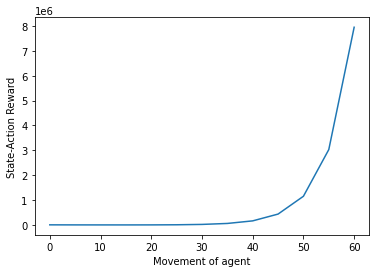

In [ ]:
xpoints = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
ypoints = metric[:13]

plt.xlabel("Movement of agent")
plt.ylabel("State-Action Reward")

plt.plot(xpoints, ypoints)
plt.show()

In [ ]:
import pandas as pd

In [ ]:
# convert array into dataframe
DF = pd.DataFrame(ypoints)
  
# save the dataframe as a csv file
DF.to_csv("data1.csv")

In [ ]:
print(xpoints)
print(ypoints)

[ 0  5 10 15 20 25 30 35 40 45 50 55 60]
[-2100.0, -4200.0, -4945.0, -5160.0, -3995.0, 780.0, 15005.0, 53970.0, 157705.0, 431010.0, 1148255.0, 3027750.0, 7950055.0]
